In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state


def create_dataset_with_conditional_dependances(n_samples, random_state=None):
    rng = check_random_state(random_state)

    x_info_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))
    x_noise_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))

    x_info_low_card = x_info_high_card // 5
    x_noise_low_card = x_noise_high_card // 5

    rho = 0.2
    y = rng.binomial(n=1, p=0.5 + rho * (2 * (x_info_low_card >= 2) - 1)).ravel()
    X = np.concatenate(
        (x_info_high_card, x_info_low_card, x_noise_high_card, x_noise_low_card), axis=1
    )
    return (X, y)


n_samples = 10000
n_experiments = 10

importances_entropy = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)
importances_mdi_oob = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)

for i in range(n_experiments):
    X, y = create_dataset_with_conditional_dependances(
        n_samples=n_samples, random_state=i
    )
    rf = RandomForestClassifier(random_state=i, oob_score=True)
    rf.fit(X, y)
    importance_ufi = rf.ufi_feature_importances_
    importances_entropy.loc[i] = importance_ufi
    importance_mdi_oob = rf.mdi_oob_feature_importances_
    importances_mdi_oob.loc[i] = importance_mdi_oob

    print(importance_mdi_oob - importance_ufi)

[ 0.00076333  0.00287212 -0.00258664 -0.00104881]
[ 0.0008326  -0.00030769 -0.00068591  0.000161  ]
[ 0.00068366 -0.00115419  0.00104432 -0.0005738 ]
[ 0.00036925 -0.00052334  0.00058955 -0.00043546]
[ 1.43365681e-03  5.34895046e-06 -1.34467860e-03 -9.43271630e-05]
[-6.38683675e-05 -1.67363270e-03  1.46546170e-03  2.72039369e-04]
[-6.56224853e-04 -2.21557567e-03  2.82976182e-03  4.20387004e-05]
[-6.14361084e-05 -3.98469844e-04  2.90001728e-04  1.69904225e-04]
[-0.00039033  0.00136167 -0.0007693  -0.00020204]
[-1.07859645e-03  8.83380111e-05  8.90478217e-04  9.97802205e-05]


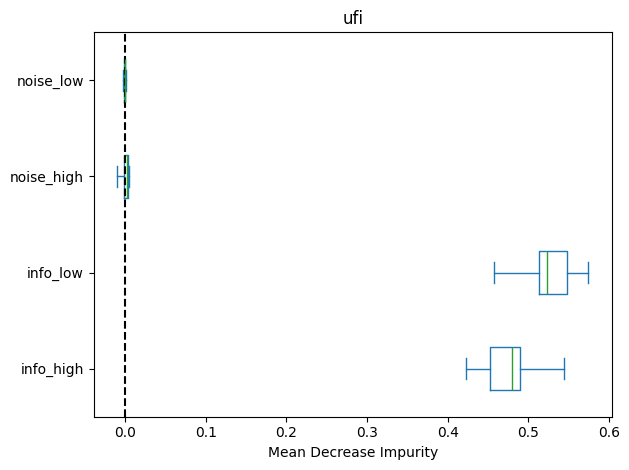

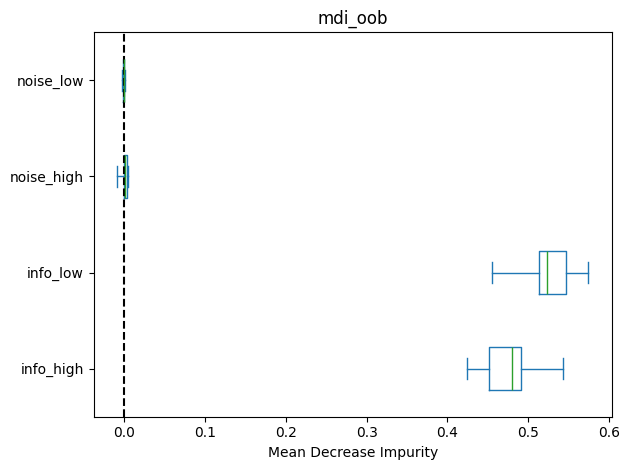

In [ ]:
ax = importances_entropy.plot.box(vert=False, whis=10)
ax.set_title("ufi")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

ax = importances_mdi_oob.plot.box(vert=False, whis=10)
ax.set_title("mdi_oob")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

In [ ]:
# Check that high cardinality is not overly corrected


def create_dataset_with_equal_informative_and_varying_card(
    n_samples, random_state=None
):
    rng = check_random_state(random_state)

    x_info_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))
    x_noise_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))

    x_info_low_card = rng.choice(4, n_samples).reshape((n_samples, 1))
    x_noise_low_card = rng.choice(4, n_samples).reshape((n_samples, 1))

    rho = 0.2
    y = np.random.binomial(
        n=1,
        p=0.5
        + rho * (2 * (x_info_low_card >= 2) - 1)
        + rho * (2 * (x_info_high_card >= 10) - 1),
    ).ravel()
    X = np.concatenate(
        (x_info_high_card, x_info_low_card, x_noise_high_card, x_noise_low_card), axis=1
    )
    return (X, y)


n_samples = 10000
n_experiments = 10

importances_entropy = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)
importances_mdi_oob = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)

for i in range(n_experiments):
    X, y = create_dataset_with_equal_informative_and_varying_card(
        n_samples=n_samples, random_state=i
    )
    rf = RandomForestClassifier(random_state=i)
    rf.fit(X, y)
    importance_ufi = rf._compute_unbiased_feature_importance_and_oob_predictions(
        X, y, method="ufi"
    )[0]
    importances_entropy.loc[i] = importance_ufi
    importance_mdi_oob = rf._compute_unbiased_feature_importance_and_oob_predictions(
        X, y, method="mdi_oob"
    )[0]
    importances_mdi_oob.loc[i] = importance_mdi_oob

    print(importance_mdi_oob - importance_ufi)

[-0.00062622  0.00128831 -0.00120763  0.00054554]
[ 1.10639506e-03 -9.90020642e-05 -6.42371695e-04 -3.65021298e-04]
[-3.14093731e-04 -2.51347712e-03  2.76391946e-03  6.36513928e-05]
[ 0.00102211  0.00181514 -0.00217529 -0.00066196]
[ 2.50259808e-03 -2.15589536e-03 -3.99088230e-04  5.23855107e-05]
[ 0.00022615  0.00170806 -0.00134656 -0.00058765]
[ 0.00159527  0.0022246  -0.00431637  0.0004965 ]
[-0.00159782 -0.00127586  0.00253776  0.00033592]
[-0.00116777  0.00028311 -0.00036374  0.0012484 ]
[ 0.0019211   0.0001257  -0.00250844  0.00046164]


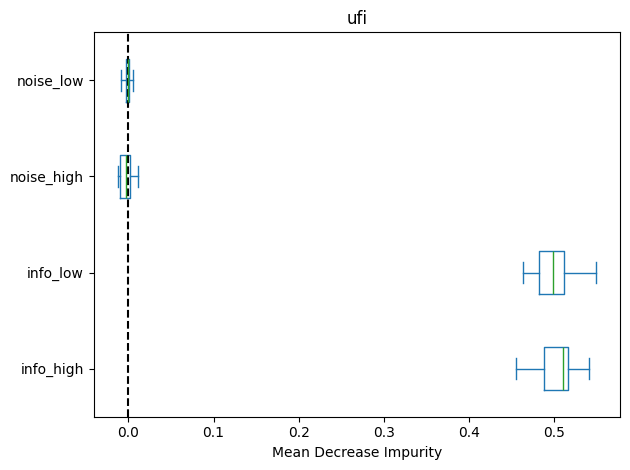

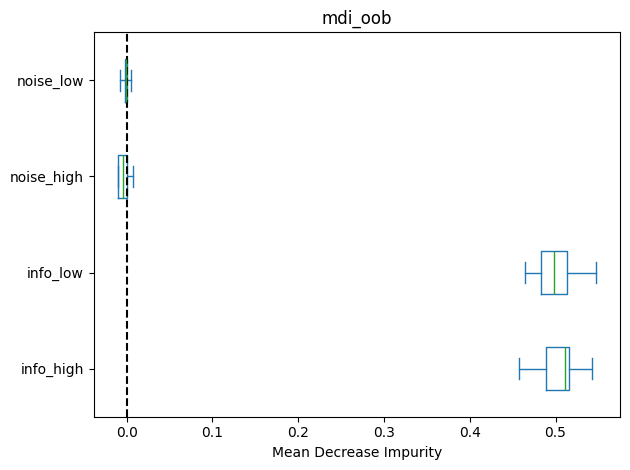

In [ ]:
ax = importances_entropy.plot.box(vert=False, whis=10)
ax.set_title("ufi")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

ax = importances_mdi_oob.plot.box(vert=False, whis=10)
ax.set_title("mdi_oob")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

In [ ]:
def gen_noise_cls(n, random_state=None, null=True):
    rng = check_random_state(random_state)
    x1 = rng.normal(size=n).reshape((n, 1))
    x2 = rng.choice(2, n).reshape((n, 1))
    x3 = rng.choice(4, n).reshape((n, 1))
    x4 = rng.choice(10, n).reshape((n, 1))
    x5 = rng.choice(20, n).reshape((n, 1))

    y = x2.copy()
    rho = 0.2 * (1 - null)
    flip_prob = (1 + rho) / 2
    flip_mask = rng.uniform(0, 1, size=y.shape) > flip_prob
    y[flip_mask] = 1 - y[flip_mask]

    y = y.ravel()

    X = np.concatenate((x1, x2, x3, x4, x5), axis=1)

    return [X, y]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state


def create_dataset_with_conditional_dependances(n_samples, random_state=None):
    rng = check_random_state(random_state)

    x_info_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))
    x_noise_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))

    x_info_low_card = x_info_high_card // 5
    x_noise_low_card = x_noise_high_card // 5

    rho = 0.2
    y = rng.binomial(n=1, p=0.5 + rho * (2 * (x_info_low_card >= 2) - 1)).ravel()
    X = np.concatenate(
        (x_info_high_card, x_info_low_card, x_noise_high_card, x_noise_low_card), axis=1
    )
    return (X, y)


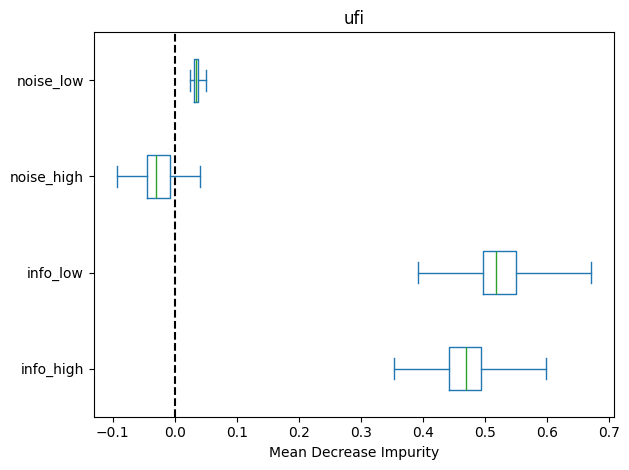

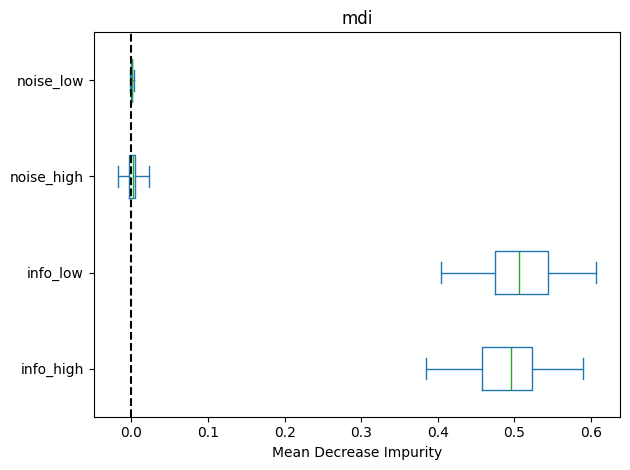

In [3]:
n_samples = 10000
n_experiments = 50

importances_entropy = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)
importances_gini = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)

for i in range(n_experiments):
    X, y = create_dataset_with_conditional_dependances(
        n_samples=n_samples, random_state=i
    )
    rf = RandomForestClassifier(random_state=i, oob_score=True, criterion='entropy')
    rf.fit(X, y)
    importance_ufi_entropy = rf.ufi_feature_importances_
    importances_entropy.loc[i] = importance_ufi_entropy
    rf = RandomForestClassifier(random_state=i, oob_score=True, criterion='gini')
    rf.fit(X, y)
    importance_ufi_gini = rf.ufi_feature_importances_
    importances_gini.loc[i] = importance_ufi_gini


ax = importances_entropy.plot.box(vert=False, whis=10)
ax.set_title("ufi")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

ax = importances_gini.plot.box(vert=False, whis=10)
ax.set_title("mdi")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()